In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/Users/aishwarya/Downloads/HR-Employee-Attrition.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
df = df.drop_duplicates()
df = df.dropna()

In [4]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


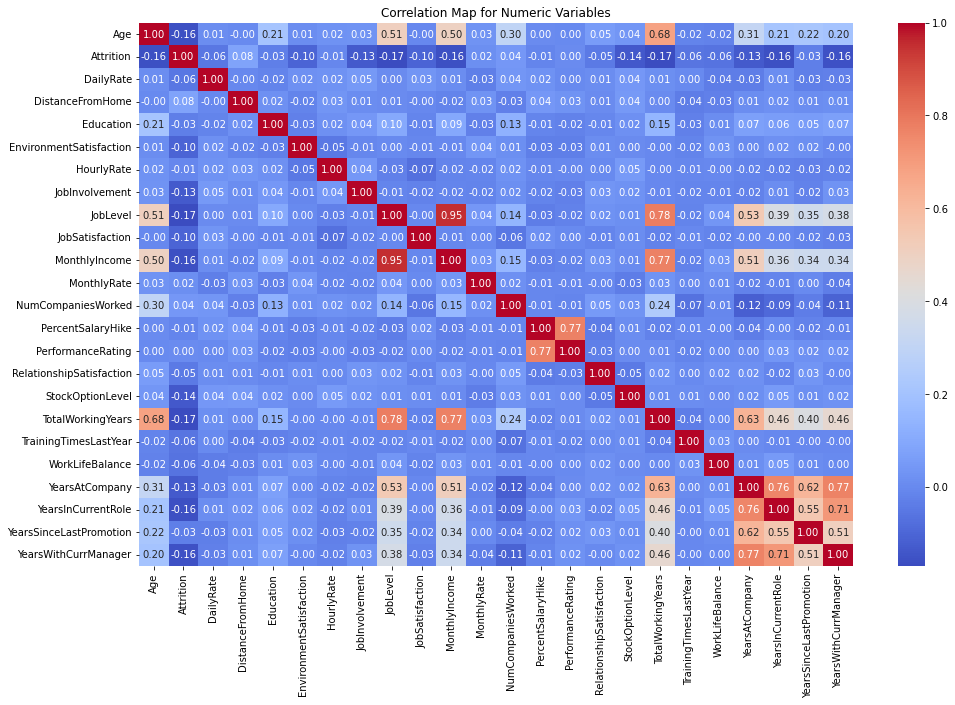

In [5]:
# Prepare the correlation matrix
correlation_matrix = (df.select_dtypes(include=['number'])).corr()
# Create a Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map for Numeric Variables')
plt.show()

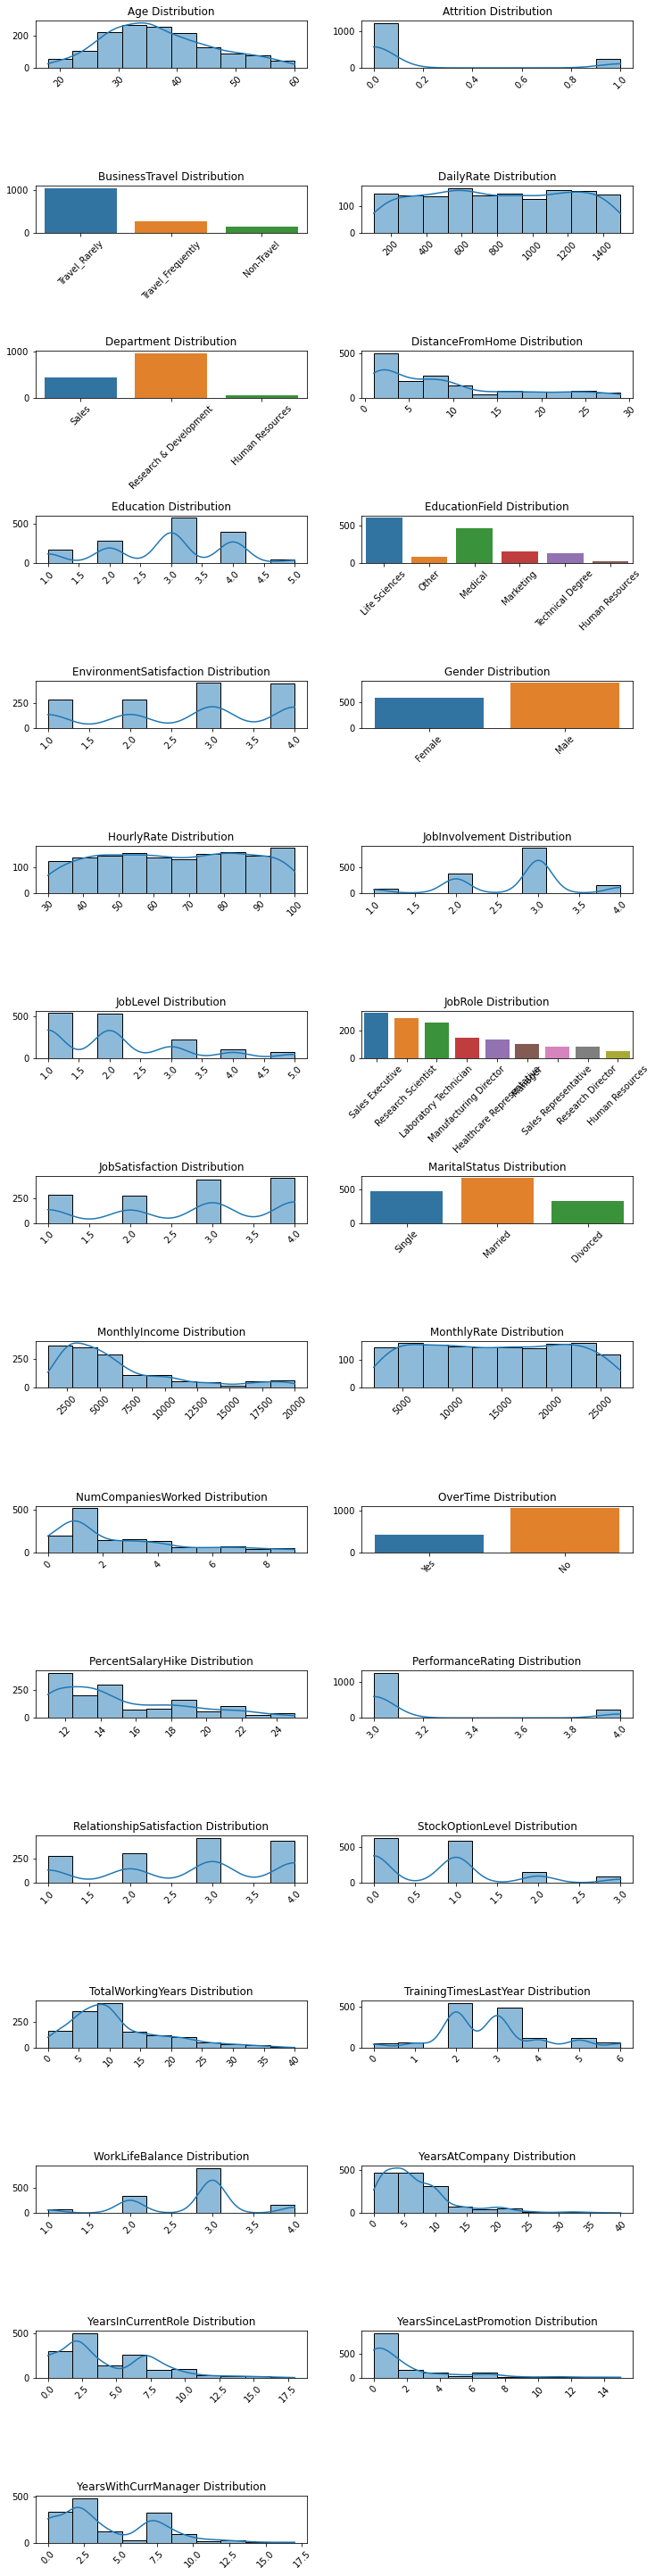

In [6]:
fig, axes = plt.subplots(len(df.columns)//2 +1, 2, figsize=(12, 52))

fig.subplots_adjust(hspace=2.5)
axes = axes.flatten()

# Create a loop to generate visualizations for all columns
for i, column in enumerate(df.columns):
    plt.sca(axes[i])
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, ax=axes[i])
    else:
        sns.histplot(df[column], bins=10, kde=True, ax=axes[i])
    plt.title(f'{column} Distribution')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45)

# Remove any empty subplot if the number of columns is odd
if len(df.columns) % 2 != 0:
    fig.delaxes(axes[-1])
    
plt.show()

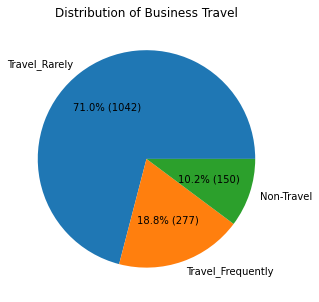

In [7]:
plt.figure(figsize=(5, 5))
business_travel_counts = df['BusinessTravel'].value_counts()
plt.pie(business_travel_counts, labels=business_travel_counts.index, autopct=lambda p:f'{p:.1f}% ({int(p * sum(business_travel_counts)/100)})')
plt.title('Distribution of Business Travel')
plt.show()

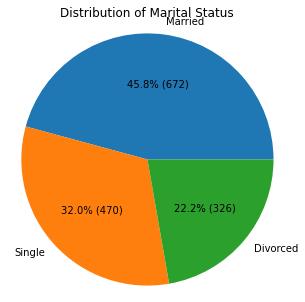

In [8]:
marital_status_counts = df['MaritalStatus'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct=lambda p:f'{p:.1f}% ({int(p*sum(marital_status_counts)/100)})')
plt.title('Distribution of Marital Status')
plt.axis('equal')
plt.show()

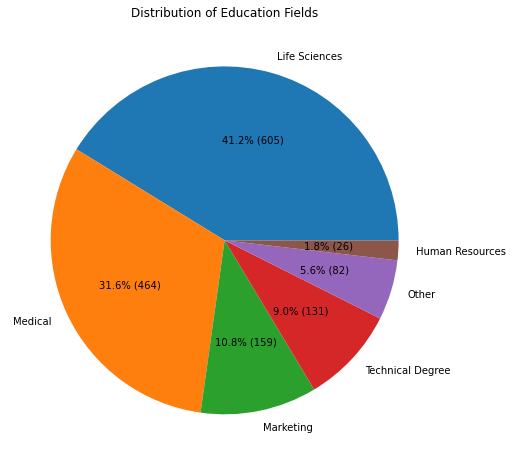

In [9]:
education_field_counts = df['EducationField'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_field_counts, labels=education_field_counts.index, autopct=lambda p:f'{p:.1f}% ({int(p*sum(education_field_counts)/100)})')
plt.title('Distribution of Education Fields')
plt.show()

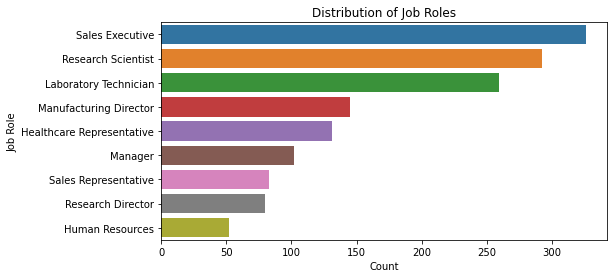

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(y='JobRole', data=df, order=df['JobRole'].value_counts().index)
plt.title('Distribution of Job Roles')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

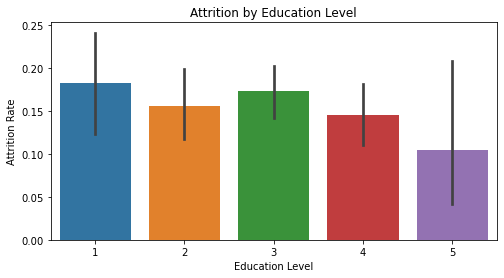

In [11]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Education', y='Attrition', data=df)
plt.title('Attrition by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Attrition Rate')
plt.show()

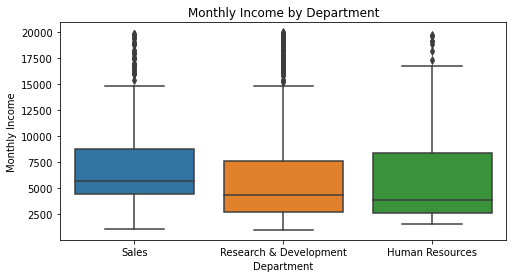

In [12]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Department', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.xticks()
plt.show()


In [13]:
# Prepare data for modeling
df = pd.get_dummies(df, drop_first=True)

In [14]:
# Define features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Predict on the test set
y_pred = model.predict(X_test)

In [19]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88
